In [3]:
%store -r after_scaler
%store -r out

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras import layers, Sequential
from tensorflow import feature_column

In [62]:
df = out.copy()
df.rename(columns = {'Gender':'gender',	
                     'Age':'age', 
                     'Birth Weight':'birth_weight',
                     'Birth Length' : 'birth_length', 
                     'Body Weight' : 'body_weight', 
                     'Body Length' : 'body_length', 
                     'Breastfeeding':'breastfeeding'},
                     inplace = True)

df.head()

,gender,age,birth_weight,birth_length,body_weight,body_length,breastfeeding,Stunting,BMI
0,1,17,3.0,49,31.6,156.2,2,2,20.230474
1,1,16,2.9,49,66.5,156.2,2,1,42.573624
2,2,11,2.8,49,66.5,185.0,2,2,35.945946
3,2,17,2.8,49,78.1,193.0,2,1,40.466321
4,2,10,2.7,49,68.8,151.0,2,2,45.562914


In [63]:
df.gender[df['gender'] == 2] = 0
df.Stunting[df['Stunting'] == 2] = 0
df.BMI = round(df.BMI, 2)
df.drop('breastfeeding', axis=1, inplace=True)
df.head(1)

C:\Users\KAZU\AppData\Local\Temp\ipykernel_23744\488796399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.gender[df['gender'] == 2] = 0
C:\Users\KAZU\AppData\Local\Temp\ipykernel_23744\488796399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Stunting[df['Stunting'] == 2] = 0


,gender,age,birth_weight,birth_length,body_weight,body_length,Stunting,BMI
0,1,17,3.0,49,31.6,156.2,0,20.23


In [64]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_val = train_test_split(df_train, test_size=0.2)

In [65]:
print(len(df_train))
print(len(df_test))
print(len(df_val))

3488
1091
872


In [66]:
def df_to_dt(df, shuffle=True, batch_size=32):
    dt = df.copy()
    target = dt['Stunting'].values
    dt.drop('Stunting', axis=1, inplace=True)
    ds = tf.data.Dataset.from_tensor_slices((dict(dt), target))

    if shuffle:
        ds = ds.shuffle(2)
    ds = ds.batch(batch_size)

    return ds

In [67]:
bacth_size = 32
dt_train = df_to_dt(df_train, batch_size=bacth_size)
dt_test = df_to_dt(df_test, shuffle=False, batch_size=bacth_size)
dt_val = df_to_dt(df_val, shuffle=False, batch_size=bacth_size)

In [68]:
dt_train

<_BatchDataset element_spec=({'gender': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'birth_weight': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'birth_length': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'body_weight': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'body_length': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'BMI': TensorSpec(shape=(None,), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [69]:
for feature_batch, label_batch in dt_train.take(1):
    print('Feature:', list(feature_batch.keys()))
    print('Body Weight values batch:', feature_batch['body_weight'])
    print('Label batch:', label_batch )

Feature: ['gender', 'age', 'birth_weight', 'birth_length', 'body_weight', 'body_length', 'BMI']
Body Weight values batch: tf.Tensor(
[ 54.9  31.6 120.  120.  115.3 101.4 115.3  68.8 101.4  66.5  99.1  54.9
  85.1  96.7  96.7  20.   85.1  20.   31.6  54.9  68.8  96.7 120.  101.4
  66.5 115.3 115.3  78.1  85.1  99.1  54.9  68.8], shape=(32,), dtype=float64)
Label batch: tf.Tensor([0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1], shape=(32,), dtype=int64)


In [70]:
for feature_batch, label_batch in dt_train.take(1):
    print('Feature:', list(feature_batch.keys()))
    print('Body Length values batch:', feature_batch['body_length'])
    print('Label batch:', label_batch )

Feature: ['gender', 'age', 'birth_weight', 'birth_length', 'body_weight', 'body_length', 'BMI']
Body Length values batch: tf.Tensor(
[141.  193.  141.  185.  151.  169.  161.  171.8 185.  185.  185.  185.
 185.  169.  156.2 169.  151.  185.  193.  185.  125.  151.  193.  169.
 156.2 185.  171.8 185.  185.  171.8 151.  156.2], shape=(32,), dtype=float64)
Label batch: tf.Tensor([0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1], shape=(32,), dtype=int64)


In [71]:
for feature_batch, label_batch in dt_train.take(1):
    print('Feature:', list(feature_batch.keys()))
    print('Age values batch:', feature_batch['age'])
    print('Label batch:', label_batch )

Feature: ['gender', 'age', 'birth_weight', 'birth_length', 'body_weight', 'body_length', 'BMI']
Age values batch: tf.Tensor(
[11 17 12  7 13 17 14 11 11 11 11 12 12 20 11 12 13 12 13 17 11 14 10 14
 13 10  6 11  9  8 13 16], shape=(32,), dtype=int64)
Label batch: tf.Tensor([0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1], shape=(32,), dtype=int64)


In [72]:
for feature_batch, label_batch in dt_train.take(1):
    print('Feature:', list(feature_batch.keys()))
    print('BMI values batch:', feature_batch['BMI'])
    print('Label batch:', label_batch )

Feature: ['gender', 'age', 'birth_weight', 'birth_length', 'body_weight', 'body_length', 'BMI']
BMI values batch: tf.Tensor(
[16.37 38.94 64.86 85.11 67.11 67.15 32.49 71.61 54.81 37.19 35.95 53.57
 50.36 61.91 64.04 46.   28.45 10.81 18.39 52.27 55.04 76.36 11.83 60.
 62.18 42.57 49.53 42.22 53.57 45.56 62.32 36.36], shape=(32,), dtype=float64)
Label batch: tf.Tensor([1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1], shape=(32,), dtype=int64)


In [41]:
df.describe()

,gender,age,birth_weight,birth_length,body_weight,body_length,Stunting,BMI
count,5451.000000,5451.000000,5451.000000,5451.000000,5451.000000,5451.00000,5451.000000,5451.000000
mean,0.641901,12.405797,2.755641,49.101449,79.010622,168.00488,0.772886,47.705524
std,0.479486,3.419919,0.298729,0.463116,29.510311,19.03730,0.419005,18.876669
min,0.000000,6.000000,2.000000,48.000000,20.000000,125.00000,0.000000,10.360000
25%,0.000000,10.000000,2.800000,49.000000,54.900000,156.20000,1.000000,34.460000
50%,1.000000,12.000000,2.800000,49.000000,85.100000,169.00000,1.000000,49.530000
75%,1.000000,15.000000,3.000000,49.000000,101.400000,185.00000,1.000000,62.320000
max,1.000000,22.000000,3.100000,50.000000,120.000000,193.00000,1.000000,96.000000


In [73]:
col = []

num = ['age', 'birth_weight', 'birth_length', 'body_weight', 'body_length', 'BMI']

for head in num:
    num_col = tf.feature_column.numeric_column(head)
    col.append(num_col)

age = tf.feature_column.numeric_column('age')
buck_age = tf.feature_column.bucketized_column(age, boundaries=[5, 10, 15, 20, 25])
col.append(buck_age)

bmi = tf.feature_column.numeric_column('BMI')
buck_bmi = tf.feature_column.bucketized_column(bmi, boundaries=[10, 18, 25, 35, 45, 55, 65, 75, 85, 95])
col.append(buck_bmi)

bw = tf.feature_column.numeric_column('body_weight')
buck_bw = tf.feature_column.bucketized_column(bw, boundaries=[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120])
col.append(buck_bw)

bl = tf.feature_column.numeric_column('body_length')
buck_bl = tf.feature_column.bucketized_column(bl, boundaries=[120, 130, 140, 150, 160, 170, 180, 190])
col.append(buck_bl)

cross_feature = tf.feature_column.crossed_column([buck_age, buck_bmi], hash_bucket_size=100)
cross_feature = tf.feature_column.indicator_column(cross_feature)
col.append(cross_feature)

cross_feature = tf.feature_column.crossed_column([buck_bw, buck_bl], hash_bucket_size=100)
cross_feature = tf.feature_column.indicator_column(cross_feature)
col.append(cross_feature)





In [74]:
feature_layer = tf.keras.layers.DenseFeatures(col)

In [75]:
bacth_size = 10
dt_train = df_to_dt(df_train, batch_size=bacth_size)
dt_test = df_to_dt(df_test, shuffle=False, batch_size=bacth_size)
dt_val = df_to_dt(df_val, shuffle=False, batch_size=bacth_size)

In [76]:
model = tf.keras.Sequential([
        feature_layer,
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

log = model.fit(dt_train,
                validation_data=dt_val,
                epochs=100)

Epoch 1/100
349/349 [==============================] - 2s 4ms/step - loss: 0.9256 - accuracy: 0.7044 - val_loss: 0.5400 - val_accuracy: 0.7626
Epoch 2/100
349/349 [==============================] - 1s 3ms/step - loss: 0.5328 - accuracy: 0.7695 - val_loss: 0.5153 - val_accuracy: 0.7603
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7744 - val_loss: 0.5022 - val_accuracy: 0.7683
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7752 - val_loss: 0.5055 - val_accuracy: 0.7787
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.7790 - val_loss: 0.5000 - val_accuracy: 0.7810
Epoch 6/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4881 - accuracy: 0.7838 - val_loss: 0.4928 - val_accuracy: 0.7821
Epoch 7/100
349/349 [==============================] - 1s 3ms/step - loss: 0.4847 - accuracy: 0.7861 - val_loss: 0.4903 - val_accuracy: 0.7856

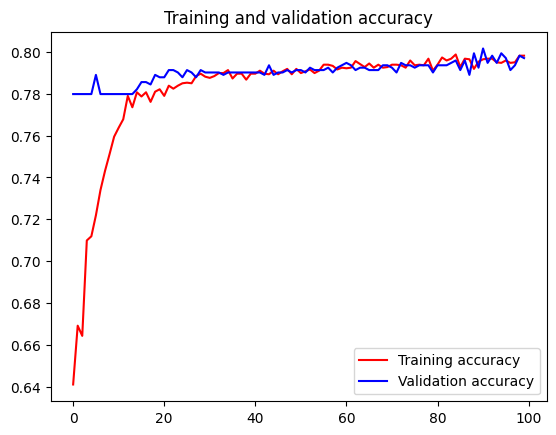

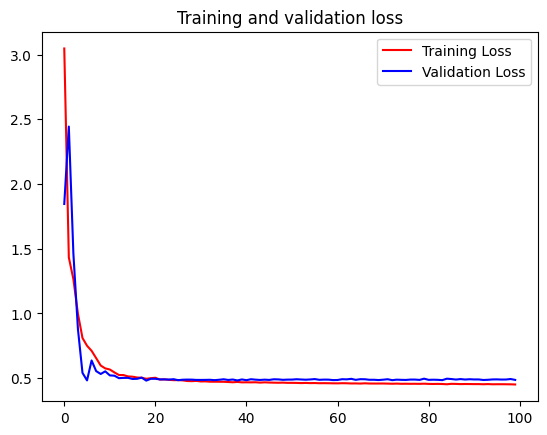

In [49]:
acc = log.history['accuracy']
val_acc = log.history['val_accuracy']
loss = log.history['loss']
val_loss = log.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
model.predict(dt_test)

110/110 [==============================] - 0s 1ms/step


array([[0.9850985 ],
       [0.5088396 ],
       [0.7170648 ],
       ...,
       [0.9110881 ],
       [0.79329973],
       [0.8881106 ]], dtype=float32)